In [356]:
# Imports the pandas library with an alias pd
import pandas as pd
# Imports the matplotlib.pyplot library with an alias plt
import matplotlib.pyplot as plt
import seaborn as sns

board = pd.read_excel('board2.xlsx')
board

,Name,Gender,Track,Hometown,Math,Electronics,GEAS,Communication
0,S1,Male,Instrumentation,Luzon,58,89,75,78
1,S2,Female,Communication,Mindanao,52,75,90,52
2,S3,Female,Instrumentation,Mindanao,83,74,77,57
3,S4,Male,Instrumentation,Visayas,65,58,91,68
4,S5,Male,Communication,Luzon,59,86,43,88
5,S6,Female,Microelectronics,Visayas,88,45,86,83
6,S7,Female,Instrumentation,Luzon,66,60,60,48
7,S8,Male,Instrumentation,Luzon,49,81,64,53
8,S9,Male,Instrumentation,Luzon,50,36,63,42
9,S10,Male,Microelectronics,Mindanao,80,84,61,44


In [374]:
def ComplexQuery(df, Hometown, columns, Track = None, Gender = None):
    
    if Track == None:
        return df.loc[(df['Hometown'] == Hometown) & (df['Gender'] == Gender),columns]
    elif Gender == None:
        return df.loc[(df['Electronics'] > 70) &(df['Hometown'] == Hometown) & (df['Track'] == Track),columns]
    else:
        return df.loc[(df['Electronics'] > 70) & (df['Hometown'] == Hometown) & (df['Track'] == Track) & (df['Gender'] == Gender),columns]
#calls the ComplexQuery() function
Instru = ComplexQuery(board, 'Luzon', ['Name','GEAS','Electronics'], 'Instrumentation', None)

Instru

,Name,GEAS,Electronics
0,S1,75,89
7,S8,64,81
29,S30,57,81


In [366]:
def GWA():
    board['Average'] = board[['Math', 'Electronics', 'GEAS', 'Communication']].mean(axis=1)
    return board['Average']
GWA()

0     75.00
1     67.25
2     72.75
3     70.50
4     69.00
5     75.50
6     58.50
7     61.75
8     47.75
9     67.25
10    54.75
11    76.00
12    62.25
13    80.50
14    59.00
15    77.25
16    70.50
17    63.50
18    73.00
19    66.50
20    68.50
21    62.50
22    68.75
23    57.75
24    75.25
25    65.75
26    60.75
27    67.75
28    63.50
29    68.00
Name: Average, dtype: float64

In [388]:
Mindy = ComplexQuery(board, 'Mindanao', ['Name','Track','Electronics'], None, 'Female') 
Mindy['Average'] = board[['Math', 'Electronics', 'GEAS', 'Communication']].mean(axis=1) 
Mindy[Mindy['Average'] >= 55]



,Name,Track,Electronics,Average
1,S2,Communication,75,67.25
2,S3,Instrumentation,74,72.75
14,S15,Microelectronics,41,59.00
16,S17,Microelectronics,79,70.50
19,S20,Communication,60,66.50


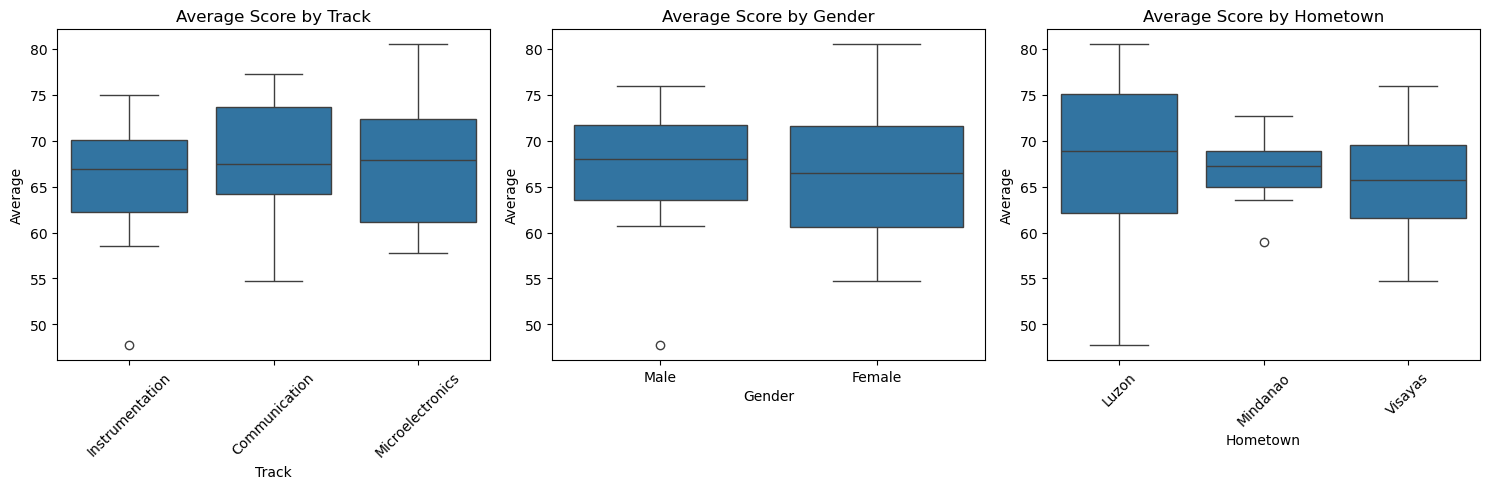

In [364]:
plt.figure(figsize=(15, 5))

# Boxplot for Track
plt.subplot(1, 3, 1)
sns.boxplot(x='Track', y=GWA(), data=board)
plt.title('Average Score by Track')
plt.xticks(rotation=45)

# Boxplot for Gender
plt.subplot(1, 3, 2)
sns.boxplot(x='Gender', y=GWA(), data=board)
plt.title('Average Score by Gender')

# Boxplot for Hometown
plt.subplot(1, 3, 3)
sns.boxplot(x='Hometown', y=GWA(), data=board)
plt.title('Average Score by Hometown')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()